# Pangenomes

In [3]:
%load_ext autoreload
%autoreload 2

In [324]:
# import dask.dataframe as dd
from pathlib import Path
import pandas as pd
from tqdm import tqdm
import pybedtools
import numpy as np
from pybedtools import BedTool
import matplotlib.pyplot as plt
import seaborn as sns
import re
import csv
import math
from pathlib import Path
import itertools
from matplotlib.ticker import MaxNLocator
from tqdm import tqdm
from collections import Counter, defaultdict
import seaborn as sns 
import pandas 

In [326]:
valid_haplotypes = [line.strip() for line in open("/storage/home/nmc6088/restored/valid_haplotyles.txt").readlines()]
len(valid_haplotypes)
valid_haplotypes

['HG01109',
 'HG03486',
 'HG03540',
 'HG02630',
 'NA21309',
 'HG02572',
 'HG00621',
 'HG01175',
 'HG01891',
 'HG00735',
 'HG03579',
 'HG01361',
 'HG02559',
 'HG03486',
 'HG02148',
 'HG02145',
 'HG03098',
 'HG02717',
 'HG01952',
 'NA21309',
 'NA20129',
 'HG01358',
 'HG02080',
 'HG02630',
 'NA18906',
 'HG03492',
 'HG02109',
 'HG01109',
 'HG02257',
 'HG01891',
 'HG02055',
 'HG00733',
 'HG02148',
 'HG01071',
 'HG00741',
 'HG01928',
 'HG01928',
 'HG01243',
 'HG02717',
 'HG02886',
 'HG00741',
 'HG01978',
 'HG02559',
 'HG03492',
 'HG01358',
 'HG00735',
 'HG01361',
 'HG02723',
 'HG03453',
 'HG01123',
 'NA20129',
 'HG02109',
 'HG02622',
 'HG03453',
 'HG01071',
 'HG01243',
 'HG03098',
 'HG02723',
 'HG01978',
 'HG03540',
 'HG02145',
 'HG02622',
 'HG02055',
 'HG02818',
 'HG03516',
 'HG01106',
 'HG01258',
 'HG00673',
 'HG00733',
 'HG01106',
 'NA18906',
 'HG02486',
 'HG02818',
 'HG03579',
 'HG02572',
 'HG00438',
 'HG01123',
 'HG01175',
 'HG02486',
 'HG01952',
 'HG00438',
 'HG00673',
 'HG02886',
 'HG

In [291]:
metadata = pd.read_table("/storage/group/izg5139/default/nicole/datasets/hprc_year1_sample_metadata.txt").set_index("Sample")['Superpopulation'].dropna().to_dict()
superpopulations = ["AFR",
                    "AMR",
                    "EAS",
                    "SAS",
                    "ASJ",
                   ]
superpopulation_colors = {superpop: color for superpop, color in zip(superpopulations, sns.color_palette("Set3").as_hex()[3:])}
metadata = metadata | {
                     "HG002":"ASJ",
                     "HG005": "EAS",
                     "NA21309": "AFR"
                    }
metadata

{'HG01123': 'AMR',
 'HG01258': 'AMR',
 'HG01358': 'AMR',
 'HG01361': 'AMR',
 'HG01891': 'AFR',
 'HG02257': 'AFR',
 'HG02486': 'AFR',
 'HG02559': 'AFR',
 'HG02572': 'AFR',
 'HG03516': 'AFR',
 'HG00438': 'EAS',
 'HG00621': 'EAS',
 'HG00673': 'EAS',
 'HG00735': 'AMR',
 'HG00741': 'AMR',
 'HG01071': 'AMR',
 'HG01106': 'AMR',
 'HG01175': 'AMR',
 'HG01928': 'AMR',
 'HG01952': 'AMR',
 'HG01978': 'AMR',
 'HG02148': 'AMR',
 'HG02622': 'AFR',
 'HG02630': 'AFR',
 'HG02717': 'AFR',
 'HG02886': 'AFR',
 'HG03453': 'AFR',
 'HG03540': 'AFR',
 'HG03579': 'AFR',
 'HG00733': 'AMR',
 'HG01109': 'AMR',
 'HG01243': 'AMR',
 'HG02080': 'EAS',
 'HG02109': 'AFR',
 'HG02145': 'AFR',
 'HG02723': 'AFR',
 'HG02818': 'AFR',
 'HG03486': 'AFR',
 'HG03492': 'SAS',
 'NA18906': 'AFR',
 'NA19240': 'AFR',
 'NA20129': 'AFR',
 'HG02055': 'AFR',
 'HG03098': 'AFR',
 'HG002': 'ASJ',
 'HG005': 'EAS',
 'NA21309': 'AFR'}

### Load Samples

In [292]:
len(metadata)

47

# Mutual Sequences

In [327]:
from pathlib import Path
indir = Path("/storage/group/izg5139/default/nicole/g4_t2t_identification/scripts/pangenomes/")

In [328]:
mode = "G4HUNTER"
common_with_reference_specific = pd.read_csv(indir.joinpath(f"common_with_reference_specific_motifs_{mode}.csv")).query("seqID != 'chrM'")
common_with_reference_specific

,haplotype,jaccard,union,total_ref,pop,mutual,total,seqID,unique_ref_motifs,shared_with_ref_perc
0,HG02257.paternal,0.027481,1820922,53731,AFR,50041,1817232,chr22,53731,93.132456
1,HG02257.paternal,0.039448,1822189,76839,AFR,71882,1817232,chr4,76839,93.548849
2,HG02257.paternal,0.087297,1826038,168213,AFR,159407,1817232,chr1,168213,94.764971
3,HG02257.paternal,0.020469,1819709,39725,AFR,37248,1817232,chr18,39725,93.764632
5,HG02257.paternal,0.031523,1821253,61432,AFR,57411,1817232,chr14,61432,93.454551
...,...,...,...,...,...,...,...,...,...,...
2019,HG02145.paternal,0.013627,1756384,25882,AFR,23934,1754436,chr21,25882,92.473534
2020,HG02145.paternal,0.051257,1759875,95645,AFR,90206,1754436,chr7,95645,94.313346
2021,HG02145.paternal,0.023292,1757661,44164,AFR,40939,1754436,chr13,44164,92.697672
2022,HG02145.paternal,0.046935,1760195,88373,AFR,82614,1754436,chr6,88373,93.483304


In [329]:
common_with_reference_specific_pivot = common_with_reference_specific.pivot(index="haplotype", 
                                                                            columns="seqID", 
                                                                            values="shared_with_ref_perc")

superpopulation_colors = {
              "EAS": "#ed1a76",
              "AMR": "#fcba03",
              "SAS": "#036bfc",
              "AFR": "#88a820"
             }


row_cols = common_with_reference_specific_pivot.index.map(lambda x: superpopulation_colors[metadata[x.split('.')[0]]])
common_with_reference_specific_pivot

seqID,chr1,chr10,chr11,chr12,chr13,chr14,chr15,chr16,chr17,chr18,...,chr20,chr21,chr22,chr3,chr4,chr5,chr6,chr7,chr8,chr9
haplotype,,,,,,,,,,,,,,,,,,,,,
HG00438.maternal,95.784511,94.719779,95.444651,95.173962,94.207952,94.917958,94.947507,94.388126,95.724101,94.537445,...,95.165466,93.130361,94.545048,95.534653,94.573068,95.324799,94.620529,94.590412,94.783354,95.508924
HG00438.paternal,95.657292,94.478326,95.671188,95.281419,94.441174,94.948887,94.814590,95.219515,95.462267,94.726243,...,95.208337,92.029209,95.019635,95.577228,94.351827,95.236587,94.448531,94.808929,95.035488,95.455861
HG00621.maternal,95.549095,94.684638,95.523447,95.431860,93.906802,94.266832,94.735514,94.710735,95.818231,94.678414,...,95.119297,92.624218,94.020212,95.560396,94.724033,95.225278,94.660134,94.860160,94.609382,95.452243
HG00621.paternal,95.559202,94.969167,95.650504,95.447382,93.947559,94.375895,95.112390,94.501613,95.737084,94.743864,...,95.462265,92.890812,94.262158,95.503960,94.480667,95.297657,94.444004,94.611323,94.880426,95.276170
HG00673.maternal,95.682260,94.723179,95.539206,95.470067,94.443438,95.256544,95.319335,95.163409,95.738166,94.794210,...,95.351790,92.921722,95.092219,95.551485,94.547040,95.487650,94.550372,94.848659,94.808568,95.650024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA18906.paternal,94.359532,93.793643,94.643895,94.456384,92.677294,93.750814,94.037284,93.846193,94.780633,93.550661,...,94.179432,92.187621,92.626231,94.559406,93.483778,93.853479,93.766196,93.852266,93.991654,94.371684
NA20129.maternal,95.341620,94.347964,95.295925,95.036655,94.146816,94.898424,94.388923,94.648254,95.695970,95.013216,...,94.664204,91.816707,93.044983,94.926733,93.787009,94.582919,94.716712,93.977730,94.309343,95.138688
NA20129.paternal,94.759620,93.884329,94.838913,94.415789,92.958065,93.614077,93.884178,93.943103,94.796862,93.817495,...,94.929675,94.536744,92.267034,94.573267,93.185752,94.486791,93.606645,93.711119,93.994176,94.311384


In [330]:
scaffold_df = pd.read_table("/storage/group/izg5139/default/nicole/pangenome_extractions/scaffold_pangenome_mapping.txt",
                           header=None,
                           names=["haplotype", "scaffold", "seqID"]
                           )
scaffold_df.loc[:, "haplotype"] = scaffold_df["haplotype"].str.split("#", expand=True)[0]

haplotypes = set()
individual_sex = dict()
for _, row in scaffold_df.iterrows():

    haplotype = row['haplotype']
    seqID = row['seqID']
    haplotypes.add(haplotype)

    if seqID == "chrY":
        individual_sex.update({haplotype: "XY"})

for h in haplotypes:
     if h not in individual_sex:
         individual_sex[h] = "XX"

individual_sex = pd.Series(individual_sex)
len(individual_sex)

44

In [331]:
scaffold_df.query("haplotype == 'HG01106'")

,haplotype,scaffold,seqID
52,HG01106,JAHAMC010000131.1,chr1
62,HG01106,JAHAMB010000131.1,chr1
114,HG01106,JAHAMC010000119.1,chr1
115,HG01106,JAHAMB010000093.1,chr1
232,HG01106,JAHAMC010000030.1,chr1
...,...,...,...
19605,HG01106,JAHAMC010000104.1,chrY
19618,HG01106,JAHAMC010000120.1,chrY
19628,HG01106,JAHAMC010000114.1,chrY
19671,HG01106,JAHAMC010000088.1,chrY


In [332]:
year1_metadata = pd.read_table("https://raw.githubusercontent.com/human-pangenomics/HPP_Year1_Data_Freeze_v1.0/refs/heads/main/sample_metadata/hprc_year1_sample_metadata.txt")


super_pop = year1_metadata.set_index("Sample")["Superpopulation"].to_dict()
sex_pop = year1_metadata.set_index("Sample")["Sex"]

sex_pop.value_counts()

Sex
female    28
male      19
Name: count, dtype: int64

In [345]:
sex_pop_meta = sex_pop.to_dict()
sex_pop_meta

{'HG01123': 'female',
 'HG01258': 'male',
 'HG01358': 'male',
 'HG01361': 'female',
 'HG01891': 'female',
 'HG02257': 'female',
 'HG02486': 'male',
 'HG02559': 'female',
 'HG02572': 'male',
 'HG03516': 'female',
 'HG00438': 'female',
 'HG00621': 'male',
 'HG00673': 'male',
 'HG00735': 'female',
 'HG00741': 'female',
 'HG01071': 'female',
 'HG01106': 'male',
 'HG01175': 'female',
 'HG01928': 'male',
 'HG01952': 'male',
 'HG01978': 'female',
 'HG02148': 'female',
 'HG02622': 'female',
 'HG02630': 'female',
 'HG02717': 'male',
 'HG02886': 'female',
 'HG03453': 'female',
 'HG03540': 'female',
 'HG03579': 'male',
 'HG002': 'male',
 'HG005': 'male',
 'HG00733': 'female',
 'HG01109': 'male',
 'HG01243': 'male',
 'HG02080': 'female',
 'HG02109': 'female',
 'HG02145': 'male',
 'HG02723': 'female',
 'HG02818': 'female',
 'HG03486': 'female',
 'HG03492': 'male',
 'NA18906': 'female',
 'NA19240': 'female',
 'NA20129': 'female',
 'NA21309': 'female',
 'HG02055': 'male',
 'HG03098': 'male'}

In [346]:
# sex_pop_meta = set(sex_pop.to_frame(name='sex').query("sex != 'female'")['sex'].to_dict().keys())
# sex_pop_meta - set(individual_sex.index.map(lambda x: x.split("#")[0]))
# sex_pop_meta

In [347]:
# metadata
import numpy as np

for key, val in metadata.items():

    if key not in super_pop or not isinstance(super_pop[key], str):
        print(key, val, super_pop[key])
    else:
        assert super_pop[key] == val, f"{super_pop[key]} != {val}"

HG002 ASJ nan
HG005 EAS nan
NA21309 AFR nan


In [348]:
year1_metadata

,Sample,Cohort,Sex,FamilyID,Subpopulation,Superpopulation,Notes
0,HG01123,HPRC,female,CLM02,CLM,AMR,NaN
1,HG01258,HPRC,male,CLM16,CLM,AMR,NaN
2,HG01358,HPRC,male,CLM31,CLM,AMR,NaN
3,HG01361,HPRC,female,CLM32,CLM,AMR,NaN
4,HG01891,HPRC,female,BB05,ACB,AFR,NaN
5,HG02257,HPRC,female,BB21,ACB,AFR,NaN
6,HG02486,HPRC,male,BB55,ACB,AFR,NaN
7,HG02559,HPRC,female,BB68,ACB,AFR,NaN
8,HG02572,HPRC,male,GB21,GWD,AFR,NaN
9,HG03516,HPRC,female,NG107,ESN,AFR,NaN


In [350]:
haplotype_colors = {"paternal": "#d687d1",
                     "maternal": "#f5eba2"
                     }
sex_colors = {
               "male": "#a97ccf",
              "female": "#92d4b7"
             }

superpopulation_colors = {
              "EAS": "#ed1a76",
              "AMR": "#fcba03",
              "SAS": "#036bfc",
              "AFR": "#169e87"
             }

In [351]:
row_colors = common_with_reference_specific_pivot.index.map(lambda x: metadata[x.split(".")[0]]).map(superpopulation_colors)
row_colors_x = common_with_reference_specific_pivot.index.map(lambda x: x.split(".")[1]).map(haplotype_colors)
row_colors_y = common_with_reference_specific_pivot.index.map(lambda x: sex_pop_meta[x.split(".")[0]]).map(sex_colors)

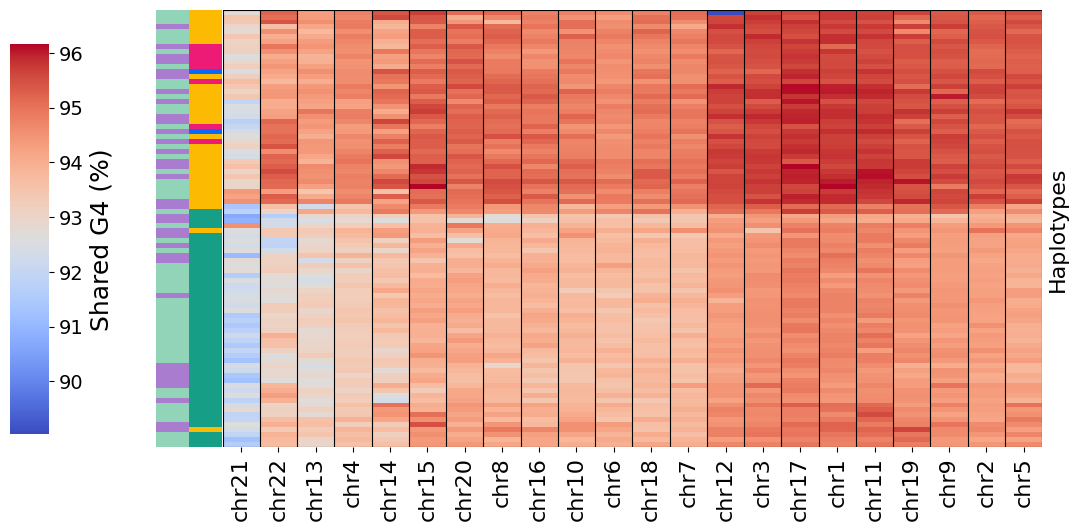

In [352]:
import math
import matplotlib.pyplot as plt

cg = sns.clustermap(
                data=common_with_reference_specific_pivot, 
                cmap="coolwarm",
                row_colors=[row_colors_y, row_colors],
                cbar_pos=(0.07, 0.15, 0.03, 0.6),
                figsize=(13, 6.5),
                row_cluster=True,
                col_cluster=True,
            )
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False) 
ax = cg.ax_heatmap

ax.set_xticklabels(cg.ax_heatmap.get_xmajorticklabels(), fontsize = 16)
ax.set_ylabel('')
ax.tick_params(axis="y", rotation=0, labelsize=16)

cg.cax.set_ylabel("Shared G4 (%)", fontsize=18)
cg.cax.tick_params(labelsize=14)

ax.set_xlabel('')
ax.set_ylabel("Haplotypes")
ax.yaxis.label.set_size(16)
ax.set_yticks([])

for i in range(len(common_with_reference_specific_pivot.columns) + 2):  # +1 to include the last edge
    ax.axvline(i, color="black", lw=0.8)
    # ax.axhline(i, color="black", lw=0.8)
ax.axhline(0, color="black", lw=0.8)
ax.axhline(len(common_with_reference_specific_pivot.index), 
           color="black", 
           lw=0.8)


# Add significance values
# Get the reordered indices after clustering
row_order = cg.dendrogram_row.reordered_ind
col_order = cg.dendrogram_col.reordered_ind

# significance_values

# # Loop over each cell and add significance values
# for i in range(len(data)):
#     for j in range(len(data.columns)):
#         x = j + 0.5  # Adjust text position to center in cell
#         y = i + 0.5
#         sig = significance[row_order[i], col_order[j]]  # Get significance at correct position
#         g.ax_heatmap.text(x, y, sig, 
#                           ha="center", 
#                           va="center", 
#                           fontsize=15, 
#                           color="black")
fig = plt.gcf()
MODE = "G4HUNTER"
figures = Path("/storage/group/izg5139/default/nicole/g4_t2t_identification/figures/figure1")
fig.savefig(f"{figures}/clustermap_shared_perc_with_reference_{MODE}.pdf", 
            bbox_inches="tight",
            dpi=600,
           format="pdf")

In [ ]:
common_with_reference_specific

##### The sequences that are shared -> Where do they belong in the reference? -> which genomic areas! Enrichment(!)
##### The sequences that are lonely -> Same

## Jaccard index on proportion of shared G4 sequences between individuals (clustering without dendrogram)

In [297]:
MODE = "REGEX"

jaccard_df = pd.read_csv(indir.joinpath(MODE, f"jaccard_pairwise_haplotypes_unique_motifs_{MODE}.csv"))
jaccard_df

,sampleA,sampleB,jaccard
0,HG02257.paternal,HG02257.paternal,1.000000
1,HG02257.paternal,HG02257.maternal,0.721752
2,HG02257.paternal,HG02559.paternal,0.709968
3,HG02257.paternal,HG02559.maternal,0.695476
4,HG02257.paternal,HG02486.paternal,0.671896
...,...,...,...
7739,HG02145.paternal,HG03098.maternal,0.702143
7740,HG02145.paternal,HG00733.paternal,0.668973
7741,HG02145.paternal,HG00733.maternal,0.679384
7742,HG02145.paternal,HG02145.maternal,0.677416


In [298]:
jaccard_df = jaccard_df.query("sampleA != 'chm13v2' & sampleB != 'chm13v2'")

In [340]:
haplotype_colors = {"paternal": "#d687d1",
                     "maternal": "#f5eba2"
                     }
sex_colors = {
               "male": "#455aba",
              "female": "#92d4b7"
             }

superpopulation_colors = {
              "EAS": "#ed1a76",
              "AMR": "#fcba03",
              "SAS": "#036bfc",
              "AFR": "#169e87"
             }

In [341]:
jaccard_pivot_df = jaccard_df.pivot(index="sampleA", 
                              columns="sampleB", 
                              values="jaccard")
row_colors = jaccard_pivot_df.index.map(lambda x: metadata[x.split(".")[0]]).map(superpopulation_colors)
row_colors_x = jaccard_pivot_df.index.map(lambda x: x.split(".")[1]).map(haplotype_colors)
row_colors_y = jaccard_pivot_df.index.map(lambda x: sex_pop_meta[x.split(".")[0]]).map(sex_colors)

col_colors = jaccard_pivot_df.columns.map(lambda x: metadata[x.split(".")[0]]).map(superpopulation_colors)
col_colors_x = jaccard_pivot_df.columns.map(lambda x: x.split(".")[1]).map(haplotype_colors)
col_colors_y = jaccard_pivot_df.columns.map(lambda x: sex_pop_meta[x.split(".")[0]]).map(sex_colors)

jaccard_pivot_df

TypeError: 'set' object is not subscriptable

In [301]:
figures = Path("figures")
figures.mkdir(exist_ok=True)

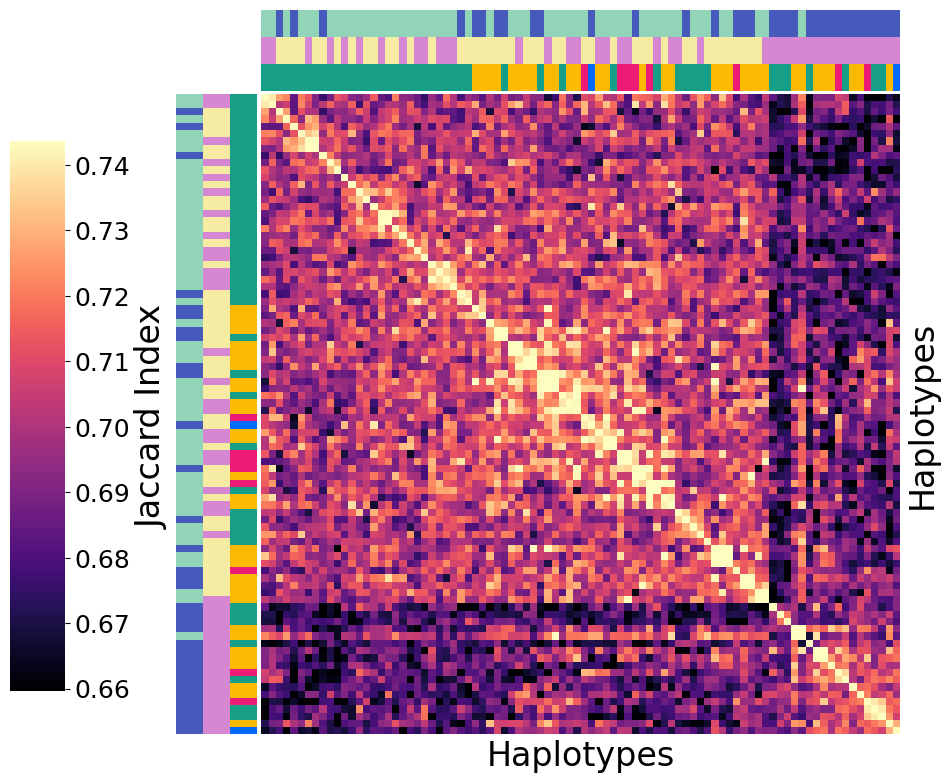

In [302]:
import seaborn as sns
import matplotlib.pyplot as plt

# row_colors = jaccard_pivot_df.index.map(lambda x: metadata[x.split(".")[0]]).map(superpopulation_colors)
# col_colors = jaccard_pivot_df.columns.map(lambda x: metadata[x.split(".")[0]]).map(superpopulation_colors)

g = sns.clustermap(data=jaccard_pivot_df, 
                   row_colors=[row_colors_y, row_colors_x, row_colors], 
                   col_colors=[col_colors_y, col_colors_x, col_colors], 
                   cmap="magma", 
                   # method="average",
                   robust=True,
                   cbar_kws={'label': 'Jaccard Index'}, 
                   figsize=(11, 11))
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)

# Set the size of the ticks
g.ax_heatmap.tick_params(axis='x', labelsize=13, rotation=90)
g.ax_heatmap.tick_params(axis='y', labelsize=13, rotation=0)
g.ax_heatmap.set_xticks([])
g.ax_heatmap.set_yticks([])
g.ax_heatmap.set_ylabel("Haplotypes")
g.ax_heatmap.set_xlabel("Haplotypes")
g.ax_heatmap.xaxis.label.set_size(24)
g.ax_heatmap.yaxis.label.set_size(24)
g.ax_cbar.set_position([0.03, 0.2, 0.05, 0.5])
g.cax.tick_params(labelsize=18)
g.ax_cbar.yaxis.label.set_size(24)

figures = Path("/storage/group/izg5139/default/nicole/g4_t2t_identification/figures/figure1")
figures.mkdir(exist_ok=True, parents=True)
plt.gcf().savefig(figures.joinpath(f"{MODE}_clustermap_jaccard_g4.pdf"), 
                  bbox_inches='tight', format="pdf", dpi=600)

# Average and median number of G4 sequences that are unique to each individual with both methods separately

In [ ]:
per_assembly = defaultdict(set)
for sample_A in tqdm(sequences_per_sample):
    seq = sequences_per_sample[sample_A]
    s_A = sample_A.split('.')[0]
    per_assembly[s_A] = per_assembly[s_A].union(seq)
len(per_assembly)

In [ ]:
# for s_A in per_assembly:
#    print(s_A, len(per_assembly[s_A]))

In [ ]:
unique_sequences_per_id = (
                extract_unique_sequences(per_assembly)
                .reset_index()
                .rename(columns={"index": "Haplotype"})\
                .sort_values(by=["unique_seq"], ascending=False)
                .reset_index(drop=True)
)
unique_sequences_per_id

In [ ]:
median_g4_unique_regex = unique_sequences_per_id['unique_seq'].median()
median_g4_unique_regex

In [ ]:
average_g4_unique_regex = unique_sequences_per_id['unique_seq'].mean()
average_g4_unique_regex

In [ ]:
median_g4_unique_regex = unique_sequences['unique_seq'].median()
median_g4_unique_regex

In [ ]:
average_g4_unique_regex = unique_sequences['unique_seq'].mean()
average_g4_unique_regex

In [ ]:
figures = Path('figures')
figures.mkdir(exist_ok=True)

In [ ]:
unique_sequences['population'] = unique_sequences['Haplotype'].apply(lambda x: metadata.get(x.split('.')[0], 'CHM13v2'))
uniques_sequence = unique_sequences.sort_values(by=['unique_seq'], ascending=False).reset_index(drop=True)
unique_sequences

In [ ]:
unique_sequences.to_csv("/storage/group/izg5139/default/nicole/g4_t2t_identification/unique_g4hunter_motifs_per_haplotype.csv",
                       mode="w",
                       sep=",",
                       index=False)

In [ ]:
unique_sequences_per_id['population'] = unique_sequences_per_id['Haplotype'].apply(lambda x: metadata.get(x.split('.')[0], 'CHM13v2'))
uniques_sequence_per_id = unique_sequences_per_id.sort_values(by=['unique_seq'], ascending=False).reset_index(drop=True)
# unique_sequences_per_id['sex'] = unique_sequences_per_id['Haplotype'].str.split('.', expand=True)[1]
unique_sequences_per_id

In [ ]:
superpopulation_colors.update({"CHM13v2": sns.color_palette("Set3")[2]})

In [303]:
# total_counts_of_sequences_shared_across_X_haplotypes_G4HUNTER.csv
# total_counts_of_sequences_shared_across_X_haplotypes_REGEX.csv
# total_motifs_across_haplotypes_G4HUNTER.csv
# total_motifs_across_haplotypes_REGEX.csv
# unique_sequences_per_haplotype_G4HUNTER.csv
# unique_sequences_per_haplotype_G4HUNTER.no-sex-distinction.csv
# unique_sequences_per_haplotype_REGEX.csv
# unique_sequences_per_haplotype_REGEX.no-sex-distinction.csv

MODE = "REGEX"
unique_sequences_per_id = pd.read_csv(indir.joinpath(f"unique_sequences_per_haplotype_{MODE}.no-sex-distinction.csv"))
unique_sequences_per_id['population'] = unique_sequences_per_id['Haplotype'].apply(lambda x: metadata.get(x.split('.')[0], 'CHM13v2'))
uniques_sequence_per_id = unique_sequences_per_id.sort_values(by=['unique_seq'], ascending=False).reset_index(drop=True)
# unique_sequences_per_id['sex'] = unique_sequences_per_id['Haplotype'].str.split('.', expand=True)[1]
unique_sequences_per_id

,Haplotype,unique_seq,population
0,HG02572,5464,AFR
1,HG02055,5385,AFR
2,HG02145,4647,AFR
3,HG03098,4127,AFR
4,HG01071,3964,AMR
5,HG02109,3941,AFR
6,HG01109,3684,AMR
7,HG03516,3649,AFR
8,HG03492,3521,SAS
9,HG02080,3430,EAS


In [309]:
MODE = "G4HUNTER"
total_counts = pd.read_csv(indir.joinpath(MODE, f"total_g4_per_haplotype_{MODE}.csv"))
total_counts.loc[:, "pop"] = total_counts["haplotype"].apply(lambda x: metadata[x.split('.')[0]])
total_counts = total_counts.sort_values(by=['total_g4'], ascending=False).reset_index(drop=True).reset_index().rename(columns={"index": "Haplotypes"})
total_counts["total_g4"].mean()

2048886.0681818181

In [305]:
MODE = "REGEX"
total_counts = pd.read_csv(indir.joinpath(MODE, f"total_g4_per_haplotype_{MODE}.csv"))
total_counts.loc[:, "pop"] = total_counts["haplotype"].apply(lambda x: metadata[x.split('.')[0]])
total_counts = total_counts.sort_values(by=['total_g4'], ascending=False).reset_index(drop=True).reset_index().rename(columns={"index": "Haplotypes"})
total_counts["total_g4"].mean()

405223.6818181818

G4HUNTER


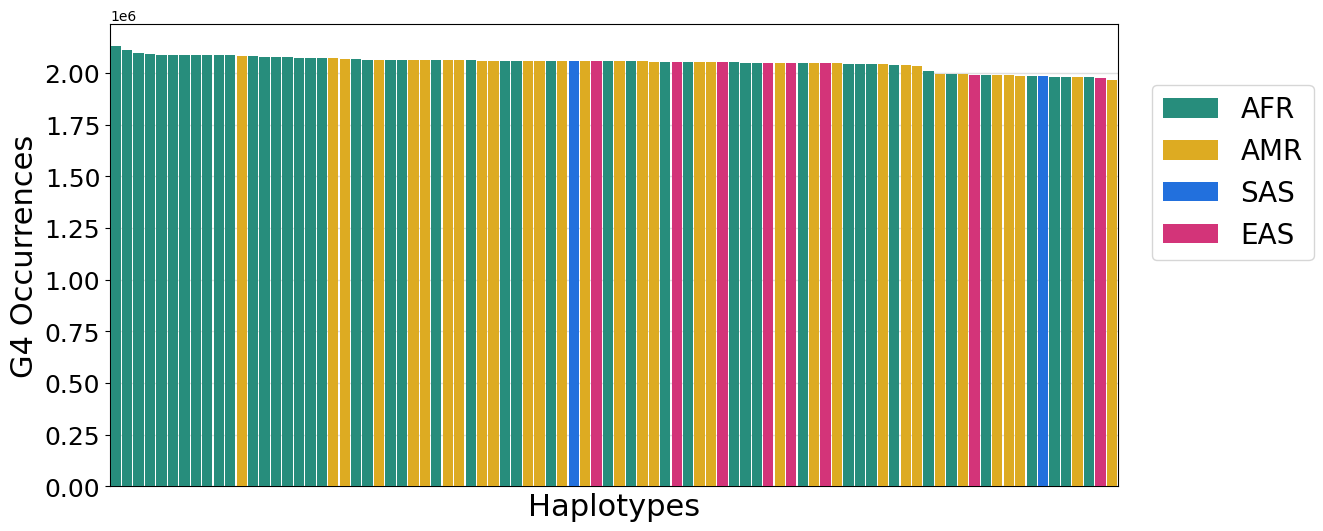

In [310]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 6))
plt.style.use('default')
print(MODE)
# superpopulation_colors = {
#               "EAS": "#ed1a76",
#               "AMR": "#fcba03",
#               "SAS": "#34bfd1",
#              # "AFR": "#88a820"
#             "AFR": "#414c9c"
#              }

sns.barplot(data=total_counts, 
            width=0.9, 
            dodge=False, 
            x="Haplotypes", 
            y="total_g4", 
            hue="pop",
            palette=superpopulation_colors,
            ax=ax, 
            zorder=3, 
            capsize=.3)
ax.grid(lw=1.0, alpha=0.4, zorder=0)
ax.set_axisbelow(True)
ax.set_ylabel("G4 Occurrences")
ax.yaxis.label.set_size(22)
ax.xaxis.label.set_size(22)
ax.tick_params(axis="both", labelsize=18)
ax.set_xticks([])
ax.legend(title="", prop={"size": 20}, bbox_to_anchor=(1.02, 0.9))
figures = Path("/storage/group/izg5139/default/nicole/g4_t2t_identification/figures/figure1")
figures.mkdir(exist_ok=True, parents=True)
fig.savefig(figures.joinpath(f"{MODE}_total_g4.pdf"), format="pdf", dpi=300, bbox_inches="tight")

In [314]:
MODE = "G4HUNTER"
unique_sequences_per_id = pd.read_csv(indir.joinpath(f"unique_sequences_per_haplotype_{MODE}.no-sex-distinction.csv"))
unique_sequences_per_id['population'] = unique_sequences_per_id['Haplotype'].apply(lambda x: metadata.get(x.split('.')[0], 'CHM13v2'))
uniques_sequence_per_id = unique_sequences_per_id.sort_values(by=['unique_seq'], ascending=False).reset_index(drop=True)
# unique_sequences_per_id['sex'] = unique_sequences_per_id['Haplotype'].str.split('.', expand=True)[1]
unique_sequences_per_id

,Haplotype,unique_seq,population
0,HG02572,20750,AFR
1,HG02055,18165,AFR
2,HG02145,16803,AFR
3,HG03098,15336,AFR
4,NA21309,15118,AFR
5,HG02109,14108,AFR
6,HG01071,13802,AMR
7,HG03516,13499,AFR
8,HG01109,13312,AMR
9,HG03492,12653,SAS


In [315]:
sex_colors_x = unique_sequences_per_id["Haplotype"].apply(lambda x: sex_colors[sex_pop_meta[x.split(".")[0]]]).tolist()
haplotype_colors_x[:5]

['#f5eba2', '#f5eba2', '#d687d1', '#d687d1', '#d687d1']

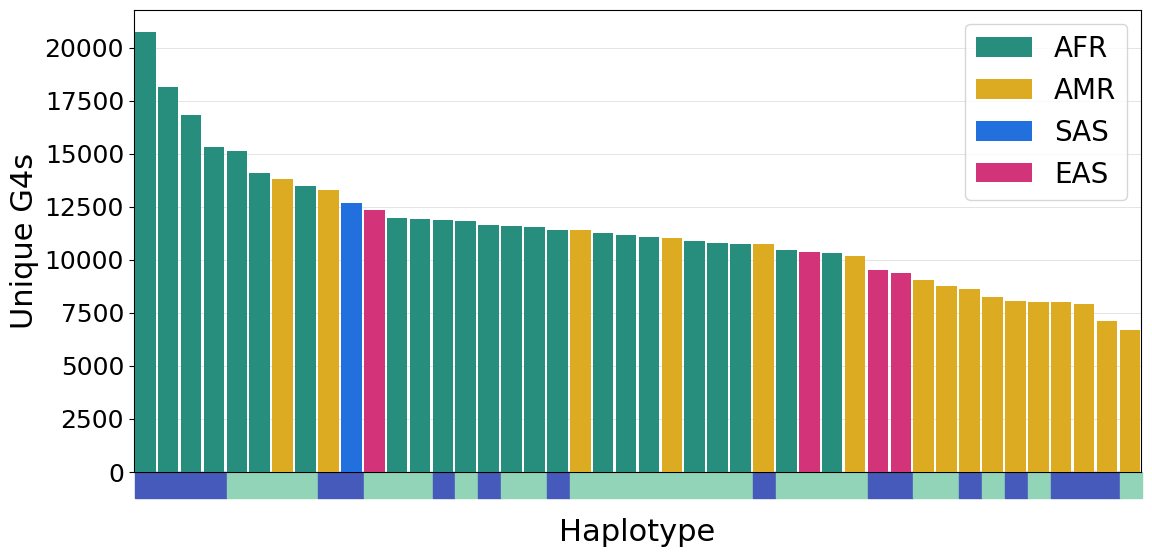

In [316]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 6))
plt.style.use('default')

sns.barplot(data=unique_sequences_per_id, 
            width=0.9, 
            dodge=False, 
            x="Haplotype", 
            y="unique_seq", 
            hue="population",
            palette=superpopulation_colors,
            ax=ax, 
            zorder=3, 
            capsize=.3)
ax.grid(lw=0.6, alpha=0.4, zorder=0)
ax.set_axisbelow(True)
ax.set_ylabel("Unique G4s")
ax.yaxis.label.set_size(22)
ax.xaxis.label.set_size(22)
ax.tick_params(axis="both", labelsize=18)
ax.legend(title="", prop={"size": 20})


xticks = ax.get_xticks()
for x, sex_color in zip(xticks, sex_colors_x):
    ax.add_patch(plt.Rectangle((x - 0.45, -0.06 * max(unique_sequences_per_id["unique_seq"])), 
                                1.0, 
                               0.06 * max(unique_sequences_per_id["unique_seq"]),
                                color=sex_color, 
                                transform=ax.transData, 
                                clip_on=False))
ax.set_xticks([])
ax.xaxis.set_label_coords(0.5, -0.10)


figures = Path("/storage/group/izg5139/default/nicole/g4_t2t_identification/figures/figure1")
figures.mkdir(exist_ok=True, parents=True)
fig.savefig(figures.joinpath(f"{MODE}_unique_g4hunter_to_each_haplotype_no_sex_diff.pdf"), 
            format="pdf", 
            dpi=600, 
            bbox_inches="tight")

In [321]:
MODE = "G4HUNTER"
unique_sequences = pd.read_csv(indir.joinpath(f"unique_sequences_per_haplotype_{MODE}.csv"))
unique_sequences['population'] = unique_sequences['Haplotype'].apply(lambda x: metadata.get(x.split('.')[0], 'CHM13v2'))
uniques_sequence = unique_sequences.sort_values(by=['unique_seq'], ascending=False).reset_index(drop=True)
unique_sequences

,Haplotype,unique_seq,population
0,HG02572.maternal,10488,AFR
1,HG02572.paternal,9939,AFR
2,HG02055.paternal,9112,AFR
3,HG02055.maternal,8749,AFR
4,HG02145.paternal,8628,AFR
...,...,...,...
83,HG02148.paternal,3509,AMR
84,HG01952.maternal,3463,AMR
85,HG01123.paternal,3425,AMR
86,HG01952.paternal,3303,AMR


In [322]:
haplotype_colors_x = unique_sequences["Haplotype"].apply(lambda x: haplotype_colors[x.split(".")[1]]).tolist()
sex_colors_x = unique_sequences["Haplotype"].apply(lambda x: sex_colors[sex_pop_meta[x.split(".")[0]]]).tolist()
haplotype_colors_x[:5]

['#f5eba2', '#d687d1', '#d687d1', '#f5eba2', '#d687d1']

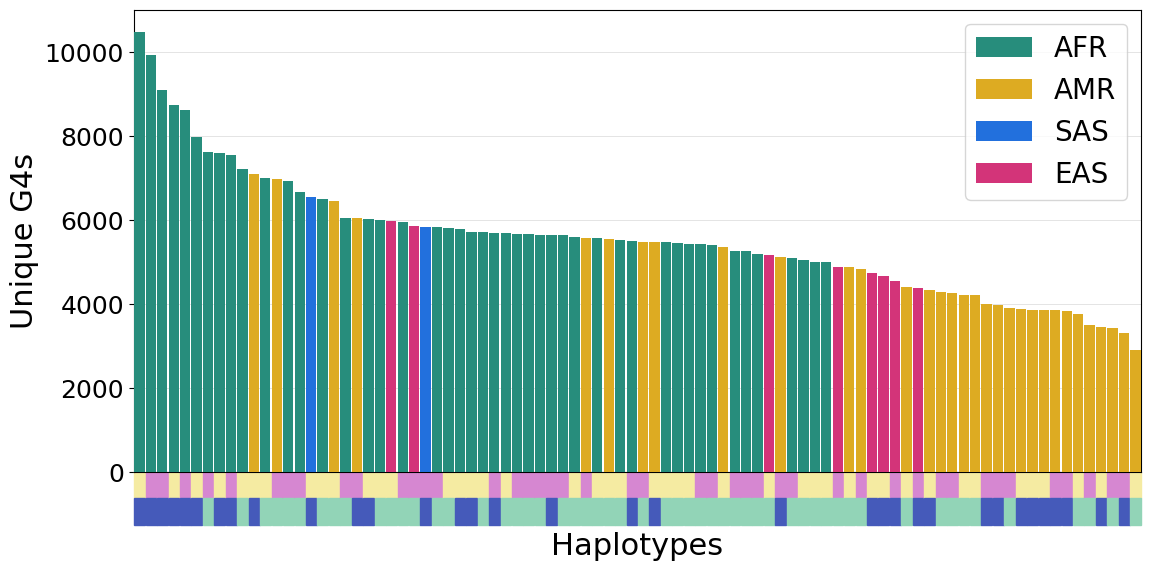

In [323]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 6))
plt.style.use('default')
sns.barplot(data=unique_sequences, 
            width=0.9, 
            dodge=False, 
            x="Haplotype", 
            y="unique_seq", 
            hue="population",
            palette=superpopulation_colors,
            ax=ax, 
            zorder=3, 
            capsize=.3)
ax.grid(lw=0.6, alpha=0.4, zorder=0)
ax.set_axisbelow(True)
ax.set_ylabel("Unique G4s")
ax.set_xlabel("Haplotypes")
ax.yaxis.label.set_size(22)
ax.xaxis.label.set_size(22)
ax.tick_params(axis="both", labelsize=18)
ax.legend(title="", prop={"size": 20})

xticks = ax.get_xticks()
for x, (sex_color, superpop_color) in zip(xticks, zip(sex_colors_x, haplotype_colors_x)):
    # Top rectangle (closer to bars)
    ax.add_patch(plt.Rectangle((x - 0.45, -0.06 * max(unique_sequences["unique_seq"])), 
                                0.95, 
                               0.06 * max(unique_sequences["unique_seq"]),
                                color=superpop_color, 
                                transform=ax.transData, 
                                clip_on=False))
    
    # Bottom rectangle (further down)
    ax.add_patch(plt.Rectangle((x - 0.45, -0.12 * max(unique_sequences["unique_seq"])), 
                                0.95, 
                               0.06 * max(unique_sequences["unique_seq"]),
                                color=sex_color, 
                                transform=ax.transData, 
                                clip_on=False))

ax.set_xticks([])
# ax.set_ylim(bottom=-0.08 * max(unique_sequences["unique_seq"]))
ax.xaxis.set_label_coords(0.5, -0.13)

figures = Path("/storage/group/izg5139/default/nicole/g4_t2t_identification/figures/figure1")
figures.mkdir(exist_ok=True, parents=True)
fig.savefig(figures.joinpath(f"{MODE}_unique_g4hunter_to_each_haplotype.with_haplotype_lineage_origin.pdf"), dpi=600, format="pdf", bbox_inches="tight")

## Barplot with G4 sequences shared in X% of people. From all to one

In [232]:
MODE = "REGEX"
g4_counter_regex = pd.read_csv(indir.joinpath(f"sequence_shared_across_X_haplotypes_and_loop_size_{MODE}.csv"))
# len_agg_g4_counter_regex['population'] = len_agg_g4_counter_regex['Haplotype'].apply(lambda x: metadata.get(x.split('.')[0], 'CHM13v2'))
# len_agg_g4_counter_regex = len_agg_g4_counter_regex.sort_values(by=['unique_seq'], ascending=False).reset_index(drop=True)
g4_counter_regex

,sequence,shared_proportion,length,loop_ratio
0,GGGGATGGTGAGGGGTGTGAGGGAGGG,88,27,40.740741
1,GGGAGGAGGGGAGTGGGTGTCAGGGG,88,26,38.461538
2,GGGTGCTCTGGGGAGAGGGGAGGTGAGGG,88,29,44.827586
3,GGGGGATGAGGGGGAGGGGGATGGGGGGG,1,29,24.137931
4,GGGGAGATGAGGGAGGGGGCGGGGG,88,25,32.000000
...,...,...,...,...
638659,GGGTAAGGTTGGGGGGGGCGGGG,1,23,26.086957
638660,GGGAATGGGTCGGGGGGAGGGGG,1,23,26.086957
638661,GGGGGCGGGGCGGGGCGGGGCGGCGCGGGGG,1,31,22.580645
638662,GGGGTTGGGTTGGGTTGGGTTGGGGTTGGGTTGGGG,1,36,33.333333


In [233]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

total = g4_counter_regex.shape[0]
len_agg_g4_counter_regex = g4_counter_regex.groupby("shared_proportion", as_index=False).agg(
                                                                                    avg_length=("length", "mean"),
                                                                                    total=("length", lambda ds: 1e2 * ds.count() / total),
                                                                                    loop_ratio=("loop_ratio", "mean")
                                                                                            )
len_agg_g4_counter_regex.loc[:, "norm_loop_ratio"] = (len_agg_g4_counter_regex["loop_ratio"] - len_agg_g4_counter_regex["loop_ratio"].min())/ (len_agg_g4_counter_regex["loop_ratio"].max() - len_agg_g4_counter_regex["loop_ratio"].min())

cmap = plt.cm.cividis
norm = mcolors.Normalize(vmin=0, vmax=1)
def value_to_single_color(val):
    rgba = cmap(norm(val))
    return rgba[0] * 255
    
len_agg_g4_counter_regex.loc[:, "colors"] = len_agg_g4_counter_regex["norm_loop_ratio"].apply(value_to_single_color)
len_agg_g4_counter_regex

,shared_proportion,avg_length,total,loop_ratio,norm_loop_ratio,colors
0,1,29.057435,19.911722,30.164630,0.040125,0.000000
1,2,28.622486,5.099865,29.816208,0.000000,0.000000
2,3,28.560349,2.725533,29.885010,0.007923,0.000000
3,4,28.348184,1.827565,29.830915,0.001694,0.000000
4,5,28.383007,1.393221,29.918433,0.011772,0.000000
...,...,...,...,...,...,...
83,84,25.622215,0.506056,35.376063,0.640279,158.295075
84,85,25.636198,0.688625,35.611794,0.667426,165.296610
85,86,25.461181,1.177771,35.611682,0.667413,165.296610
86,87,25.358390,3.084877,36.353422,0.752833,187.804440


In [234]:
len_agg_g4_counter_regex["total"].sum()

100.0

In [235]:
len_agg_g4_counter_regex["loop_ratio"].max()

38.499696435117855

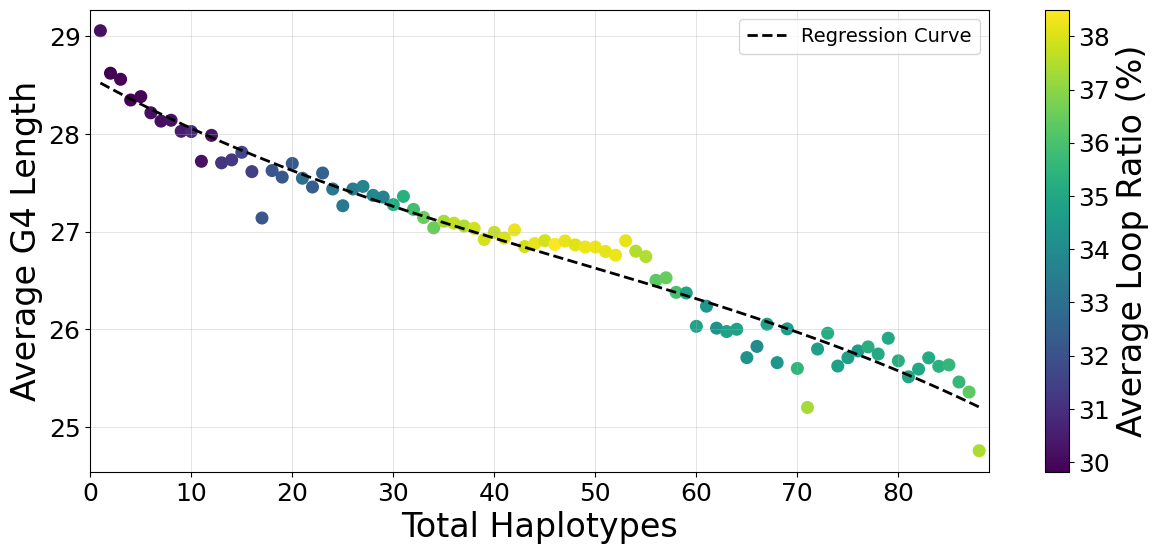

In [236]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
degree = 3
poly = PolynomialFeatures(degree=degree, include_bias=True)
X = len_agg_g4_counter_regex[["shared_proportion"]]
y = len_agg_g4_counter_regex["avg_length"]

X_poly = poly.fit_transform(X) # np.log10(X) # poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14.5, 6))

ax.plot(X, y_pred,
           color="black",
           lw=2.0,
           linestyle='--',
            label="Regression Curve",
       )
scatter = ax.scatter(
                y=len_agg_g4_counter_regex["avg_length"],
                x=len_agg_g4_counter_regex["shared_proportion"],
               c=len_agg_g4_counter_regex["loop_ratio"],
                s=70,
                # s=len_agg_g4_counter_regex["total"],
               )
ax.legend(loc=0, prop={"size": 14})
ax.grid(lw=0.4, alpha=0.6, zorder=0)
ax.set_xlim(xmin=0, xmax=89)
# sns.regplot(data=loop_agg_g4_counter_regex,
#                 y="loop_ratio",
#                 x="shared_proportion"
#                )
ax.tick_params(axis="y", labelsize=18)
ax.tick_params(axis="x", labelsize=18)
ax.set_ylabel("Average G4 Length")
ax.set_xlabel("Total Haplotypes")
ax.yaxis.label.set_size(24)
ax.xaxis.label.set_size(24)

# Add colorbar
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Average Loop Ratio (%)', size=24)  # Set the title for the colorbar
cbar.ax.tick_params(labelsize=18)


figures = Path("/storage/group/izg5139/default/nicole/g4_t2t_identification/figures/figure1")
figures.mkdir(exist_ok=True, parents=True)
fig.savefig(figures.joinpath(f"avg_length_vs_haplotypes_shared_{MODE}_{degree}.pdf"), bbox_inches="tight", dpi=600, format="pdf")

In [ ]:
g4_counter_regex_df["perc"] = 1e2 * g4_counter_regex_df["totalCounts"] / g4_counter_regex_df["totalCounts"].sum()
g4_counter_regex_df

In [237]:
# total_counts_of_sequences_shared_across_X_haplotypes_G4HUNTER.csv
# total_counts_of_sequences_shared_across_X_haplotypes_REGEX.csv
# total_motifs_across_haplotypes_G4HUNTER.csv
# total_motifs_across_haplotypes_REGEX.csv
# unique_sequences_per_haplotype_G4HUNTER.csv
# unique_sequences_per_haplotype_G4HUNTER.no-sex-distinction.csv
# unique_sequences_per_haplotype_REGEX.csv
# unique_sequences_per_haplotype_REGEX.no-sex-distinction.csv

MODE = "REGEX"
g4_counter_regex_df = pd.read_csv(indir.joinpath(f"total_counts_of_sequences_shared_across_X_haplotypes_{MODE}.csv"))
g4_counter_regex_df

,shared_proportion,sample_counts,log10_sample_counts
0,1,127169,5.104381
1,2,32571,4.512831
2,3,17407,4.240724
3,4,11672,4.067145
4,5,8898,3.949292
...,...,...,...
83,84,3232,3.509471
84,85,4398,3.643255
85,86,7522,3.876333
86,87,19702,4.294510


REGEX


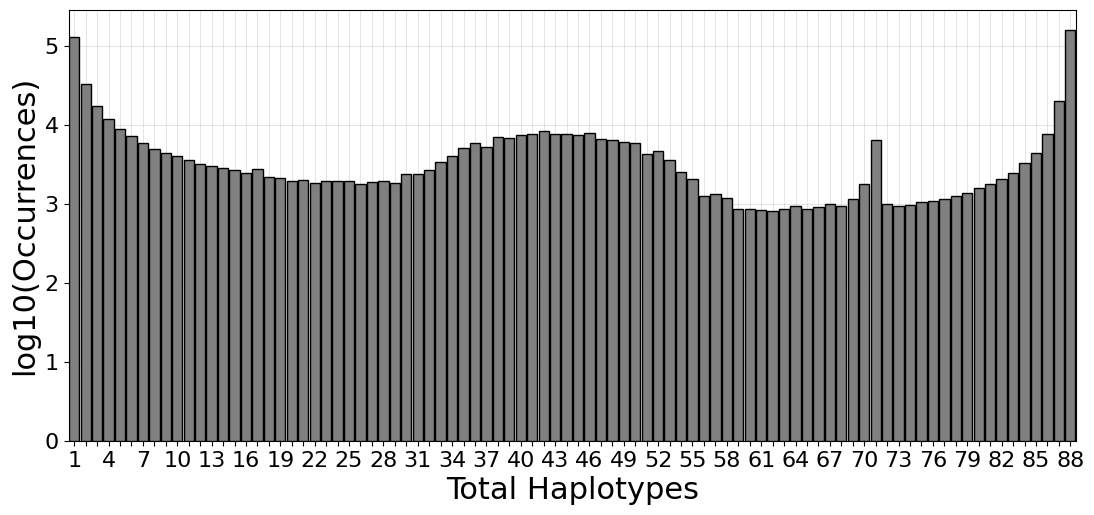

In [238]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 5.6))
plt.style.use('default')
sns.barplot(data=g4_counter_regex_df, 
            width=0.9,
            dodge=True, 
            x="shared_proportion", 
            y="log10_sample_counts", 
            color="gray",
            edgecolor='black',
            ax=ax, 
            zorder=3, 
            capsize=.3)
ax.grid(lw=0.6, alpha=0.4, zorder=0)
ax.set_axisbelow(True)
ax.set_ylabel("log10(Occurrences)")
ax.set_xlabel("Total Haplotypes")
ax.yaxis.label.set_size(22)
ax.xaxis.label.set_size(22)
ax.tick_params(axis="both", labelsize=16)
# Get the mid-top positions of each bar
x = [p.get_x() + p.get_width() / 2 for p in ax.patches]  # X positions at the middle of each bar
y = [p.get_height() for p in ax.patches]  # Heights of each bar

# Plot a line connecting the mid-top of each bar
# ax.set_xlim(-1.0, 94.3)

for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 3 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
print(MODE)
fig.savefig(figures.joinpath(f"{MODE}_g4_unique_to_number_of_haplotypes.pdf"), 
            dpi=600, format="pdf", bbox_inches="tight")